# Image Loading

This Notebook is designed to demonstrate how to handle image loading for computer vision tasks, focusing particularly on a binary classification problem. The procedure includes loading, resizing, displaying in different formats, and analyzing image datasets to provide insights into their characteristics.

## Overview of the Notebook

### 1. Environment Setup and Library Imports
We begin by setting up our environment and importing necessary libraries:
- `os` for directory manipulation.
- `cv2` (OpenCV) for image operations.
- `pandas` for data handling.
- `matplotlib` for visualizations.

### 2. Functions for Image Loading and Processing
- `load_images_original_size`: Loads images from specified subdirectories (representing classes) maintaining their original size.
- `load_and_resize_images`: Extends the image loading process to resize each image to a uniform dimension (150x150 pixels), essential for consistent input size in computer vision algorithms.

### 3. Displaying Images
- `display_images_simple`: Displays a specified number of images directly.
- `display_images_balanced`: Ensures balanced visualization by shuffling and selectively displaying an equal number of images from each category (cats and dogs).

### 4. Describing the Image Dataset
- `describe_images_basic`: Describes basic dataset characteristics such as the number of images and the dimensions of the first image.
- `describe_images_detailed`: Identifies and reports all unique image dimensions within the dataset, helping in understanding the diversity in image sizes and necessary preprocessing.

### 5. Execution and Visualization
- Functions are executed to load images from training and testing directories, display subsets of these images, and describe the datasets' characteristics.
- The process is repeated with resized images to demonstrate the impact of resizing on uniformity and dataset consistency.


In [7]:
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import random

https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification?resource=download

In [8]:
base_dir = 'path to dataset'

In [9]:
# Load images from the specified directory and maintain their original size
def load_images_original_size(base_dir, subfolder):
    classes = ['cats', 'dogs']
    images = []
    for cls in classes:
        class_dir = os.path.join(base_dir, subfolder, cls)
        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            if img is not None:
                images.append((img, cls))
    return images

# Load images from the specified directory and resize them
def load_and_resize_images(base_dir, subfolder, size=(150, 150)):
    classes = ['cats', 'dogs']
    images = []
    for cls in classes:
        class_dir = os.path.join(base_dir, subfolder, cls)
        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            if img is not None:
                resized_img = cv2.resize(img, size)
                images.append((resized_img, cls))
    return images

# Display a few images simply
def display_images_simple(image_tuples, number=5):
    plt.figure(figsize=(20, 10))
    for i, (image, label) in enumerate(image_tuples[:number]):
        plt.subplot(1, number, i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(label)
    plt.show()

# Display images ensuring balanced visualization
def display_images_balanced(image_tuples, number=6):
    plt.figure(figsize=(20, 10))
    random.shuffle(image_tuples)
    selected_images = []

    count_cats = count_dogs = number // 2

    for img, label in image_tuples:
        if label == 'cats' and count_cats > 0:
            selected_images.append((img, label))
            count_cats -= 1
        elif label == 'dogs' and count_dogs > 0:
            selected_images.append((img, label))
            count_dogs -= 1
        if len(selected_images) == number:
            break

    for i, (image, label) in enumerate(selected_images):
        plt.subplot(1, number, i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(label)
    plt.show()

# Basic description of images
def describe_images_basic(images):
    print("Number of images:", len(images))
    if images:
        img_shape = images[0][0].shape
        print("Image dimensions:", img_shape)

# Detailed description of images showing all unique dimensions
def describe_images_detailed(images):
    print("Number of images:", len(images))
    unique_dimensions = set()
    for img, label in images:
        unique_dimensions.add(img.shape)
    print("Unique image dimensions:", unique_dimensions)


In [10]:
# Load images from train and test directories
train_images = load_images_original_size(base_dir, 'train')
test_images = load_images_original_size(base_dir, 'test')
print(f'Loaded {len(train_images)} training images and {len(test_images)} testing images')

Loaded 557 training images and 140 testing images


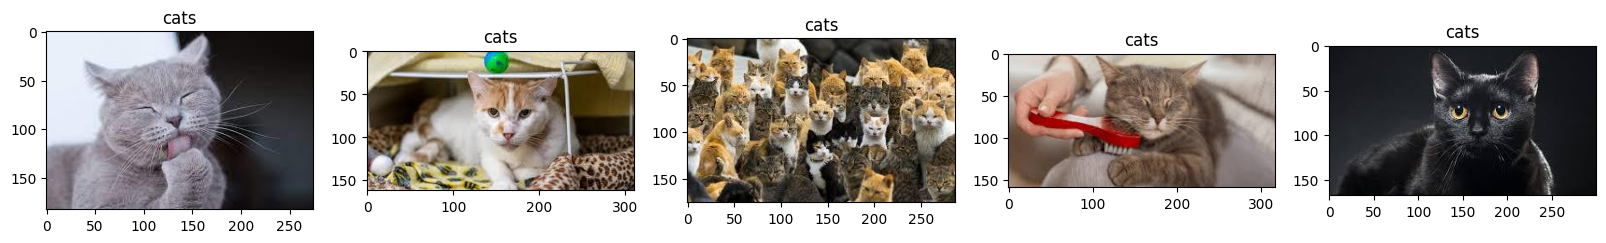

In [11]:
display_images_simple(train_images + test_images)

In [12]:
describe_images_basic(train_images + test_images)

Number of images: 697
Image dimensions: (183, 275, 3)


In [13]:
train_images = load_and_resize_images(base_dir, 'train')
test_images = load_and_resize_images(base_dir, 'test')
print(f'Loaded {len(train_images)} training images and {len(test_images)} testing images')

Loaded 557 training images and 140 testing images


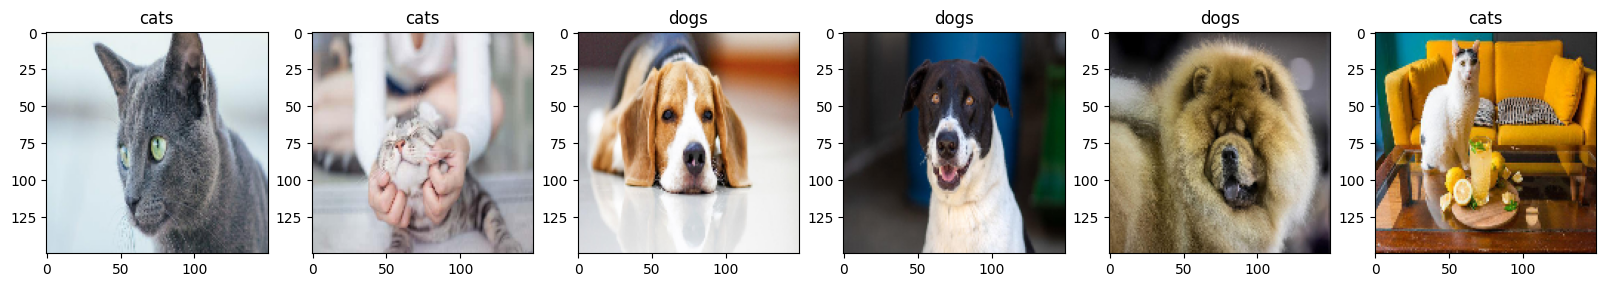

In [14]:
display_images_balanced(train_images + test_images)

In [15]:
describe_images_detailed(train_images + test_images)

Number of images: 697
Unique image dimensions: {(150, 150, 3)}
